### Neural Network - Regression

We will be creating a Neural Network that takes two features as input and produes two features as output. Inbetween the input and output layers are the two hidden layers. We will consider that we have 1000 data in our dataset. `train` is the input dataset which is fed into the network and `train_label` is the output dataset which is used to calculate cost and accuracy of the model.

The network will always produes `0.5` as ouput. Its not a very helpful function but it lets us learn alot about the different types of activation functions and their uses.

In [16]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plot
import pandas as pd
from sklearn.metrics import accuracy_score
tf.logging.set_verbosity(tf.logging.WARN)

In [17]:
seed=4
np.random.seed(seed)

### Preparing dataset

In [18]:
train=np.random.rand(1000,2)
train_label=np.ones((1000,2))/2

We will use 990 of the available dataset for training the network and the remaining 10 for testing.

In [19]:
x_test=train[-10:,:]
y_test=train_label[-10:,:]
x_train=train[:-10,:]
y_train=train_label[:-10,:]

### Tensorflow Architecture

In [20]:
x=tf.placeholder(tf.float32)
y=tf.placeholder(tf.float32)


input_units=2
hidden_units=4
output_units=2

epoches=5
batch_size=1
learning_rate=0.01

w={
    'input':tf.Variable(tf.random_normal([input_units,hidden_units], seed=seed)),
    'hidden':tf.Variable(tf.random_normal([hidden_units,hidden_units], seed=seed)),
    'output':tf.Variable(tf.random_normal([hidden_units,output_units], seed=seed))
}

b={
    'input':tf.Variable(tf.random_normal([hidden_units],seed=seed)),
    'hidden':tf.Variable(tf.random_normal([hidden_units],seed=seed)),
    'output':tf.Variable(tf.random_normal([output_units],seed=seed))
}

### Activation Function

Lets first discuss `sigmoid` and `relu` activation function learn why, where and when we should use them.
The most easy and commonly used is the `Sigmoid/Logistic` activation function.

##### sigmoid(x)
- It has an output range of (0,1) i.e it maps (-$\infty$,$\infty$) to (0,1).
- As $x\to \infty$ or $x\to -\infty$ its affect on the ouput decreases exponentially. 
- Gradient of function is very small for large value of `x`.
- It suffers from `vanishing gradient` problem (the futher the gradient is passed, the smaller it gets. Thus at one point it becomes so small that it has to effect in the calculation of the error which leads to untrained networks.).

##### Why?
- Its very easy to understand.
- Has nomalizing property.
- Gradient is easy to calculate.

##### Where?
- Due to its normalizing property it is used in the output layer of the neural network.
- Can be used in the hidden layers of shallow networks.

##### When?
- Should be in output layer when output of the neural network is expected to be in range of (0,1) which can then be scaled to requried magnitude. Functions similar to sigmoid can be used in the output layer as according to the required output range.


Function with similar characteristics are $tan^{-1}(x)$ and $tanh(x)$ and have their own advantages over the other.

To solve the vanishing gradient problem `Rectified Linear Unit` or `ReLU` in short

##### relu(x)
- It has an output range of \[0,$\infty$) i.e it maps (-$\infty$,$\infty$) to \[0,$\infty$).
- It solves the vanishing gradient problem by replacing the curve with a straight line.
- It suffers from `dying Relu` problem where a negetive values are mapped to 0 causing the node to become inactive and thus no learning takes place which is solved in `Leaky ReLU` and other similar functions.

##### Why?
- Significantly increases efficieny due to the linearity of the function.
- It addresses the vanishing gradient problem.

##### Where?
- As it rectifies the vanishing gradient problem it is used in the hidden layers of the deep neural network.
- Can be used in the output layer when creating a classifier.

##### When?
- When ever creating deep networks.

### Computational Graph

Since we are creating a regression neural network the use of normalizing activation function (such as `sigmoid`, `arcTan` or `tanh`) at the output layer is __very__ important. It makes sure that all of the calculated values are normalized to `(0,1)`, `(-1,1)`... depending on the function used. If `relu` was used, it would perform `x>0?x:0` and since `x` is returned, it need to be normalized externally. `relu` however can be used internally as cost minimization is used to tune the weights accordingly ,i.e whatever the nodes may output, the neural network learns and adjusts its weights to obtain required output.

This is however not required during classification as the __maximum node's index__ is picked which is always a constant and never calculated. Eg, during hand written digit classification, we have 10 output nodes and the node with the greatest value is picked and its index position is returned. It does not matter if the value at the nodes were `-100`, `-0.01` or `81234`. We pick the maximum value and thus always end up with the results as expected. Where as in regression, we always expect a normalized value which is then projected to a required value later.

But why use `relu` at all? why not use `sigmoid` or simialr function all the way?
The problem with this type of function lies in its shape. As the value of `x` becomes very large or small, its affect on the ouput of the function deminishes and with that the gradient of the function. Thus, in a deep network when propagating the gradient backwards, it sometimes becomes so small that is does not propagate any further than a few layers. Thus, `relu` was created to solve this problem i.e `vanishing gradient problem`.

In [21]:
hidden_layer_1=tf.matmul(x,w['input'])+b['input']
hidden_layer_1=tf.nn.relu(hidden_layer_1)

hidden_layer_2=tf.matmul(hidden_layer_1,w['hidden'])+b['hidden']
hidden_layer_2=tf.nn.relu(hidden_layer_2)

output_layer=tf.matmul(hidden_layer_2,w['output'])+b['output']
output_layer=tf.nn.sigmoid(output_layer)

### Cost

We will be using `Cross entropy` loss function to calculate the cost/loss. `AdamOptimizer` is used to minimize the loss.

In [22]:
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=output_layer,labels=y))

### Optimizer

In [23]:
optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

### Main

In [24]:
init=tf.global_variables_initializer()

##### Helper function

In [25]:
def create_batch(index):
    s=index*batch_size
    e=s+batch_size
    x_batch=x_train[s:e,:]
    y_batch=y_train[s:e]
    return x_batch,y_batch

### Session

In [26]:
ses=tf.Session()
ses.run(init)

### Train

epoch:  1  average cost:  0.693162857402
epoch:  2  average cost:  0.6931476764
epoch:  3  average cost:  0.693147185114
epoch:  4  average cost:  0.693147242069
epoch:  5  average cost:  0.693147569293


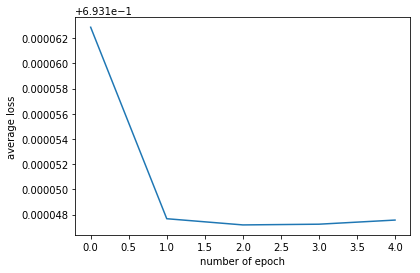

In [27]:
total_batch=int(x_train.shape[0]/batch_size)
e=[]
for epoch in range(epoches):
    avg_cost=0
    for i in range(total_batch):
        batch_x,batch_y=create_batch(i)
        o,c=ses.run([optimizer,cost],feed_dict={x:batch_x,y:batch_y})
        avg_cost+=c/total_batch
    e.append(avg_cost)
    print("epoch: ",epoch+1," average cost: ",avg_cost)
plot.plot(e)
plot.xlabel("number of epoch")
plot.ylabel("average loss")
plot.show()

### Prediction

In [28]:
prediction=ses.run(output_layer,{x:x_test})
data={'x_0':x_test[:,0],'x_1':x_test[:,1],
      'y_0':y_test[:,0],'y_1':y_test[:,1],
      'p_0':prediction[:,0],'p_1':prediction[:,1]}
df=pd.DataFrame(data=data)
df.index+=1
df

,p_0,p_1,x_0,x_1,y_0,y_1
1,0.554942,0.554977,0.158722,0.612056,0.5,0.5
2,0.562598,0.562574,0.447591,0.845948,0.5,0.5
3,0.551668,0.551731,0.415480,0.448498,0.5,0.5
4,0.561957,0.561936,0.136925,0.874424,0.5,0.5
5,0.562999,0.562974,0.738024,0.812036,0.5,0.5
6,0.552815,0.552871,0.599244,0.459854,0.5,0.5
7,0.552157,0.552219,0.729622,0.413760,0.5,0.5
8,0.544106,0.544230,0.634510,0.088047,0.5,0.5
9,0.564889,0.564844,0.111721,0.987038,0.5,0.5
10,0.553003,0.553058,0.651013,0.458083,0.5,0.5


### Accuracy

In [29]:
score=1-tf.reduce_mean(tf.squared_difference(prediction,y_test))
print("accuracy:",ses.run(score))

accuracy: 0.99681
